In [29]:
import cv2 as cv 
import numpy as np
import os
from matplotlib import pyplot as plt

In [30]:
image = cv.imread(os.path.join(os.getcwd(),'noisyImage_SaltPepper_1.jpg'),cv.IMREAD_GRAYSCALE)
print(image.shape)
m,n = image.shape

(512, 512)


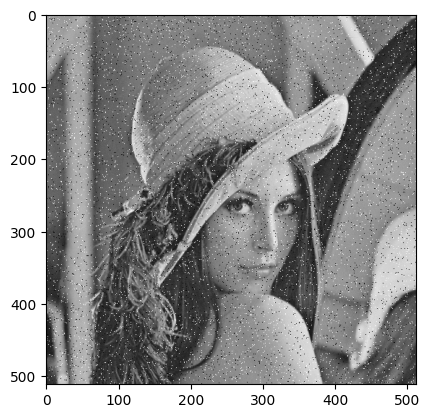

In [31]:
# Our Image
plt.imshow(image,cmap='gray',vmin=0,vmax=255)


In [32]:
# First we will apply Border Replicate Padding 
# Pad upp and down part
top_line = image[0]
bottom_line = image[-1]
image_upper_padding = np.vstack((top_line,top_line,image,bottom_line,bottom_line))

# Pad left and right
left_line = image_upper_padding[:,0]
right_line = image_upper_padding[:,-1]
image_border_padded = np.column_stack((left_line,left_line,image_upper_padding,right_line,right_line))

In [33]:
temp_image = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        all_25_values = image_border_padded[i:i+5,j:j+5].flatten()
        temp_image[i,j]=np.sort(all_25_values)[12]

final_image = temp_image.astype(np.uint8)


Text(0.5, 1.0, 'Difference')

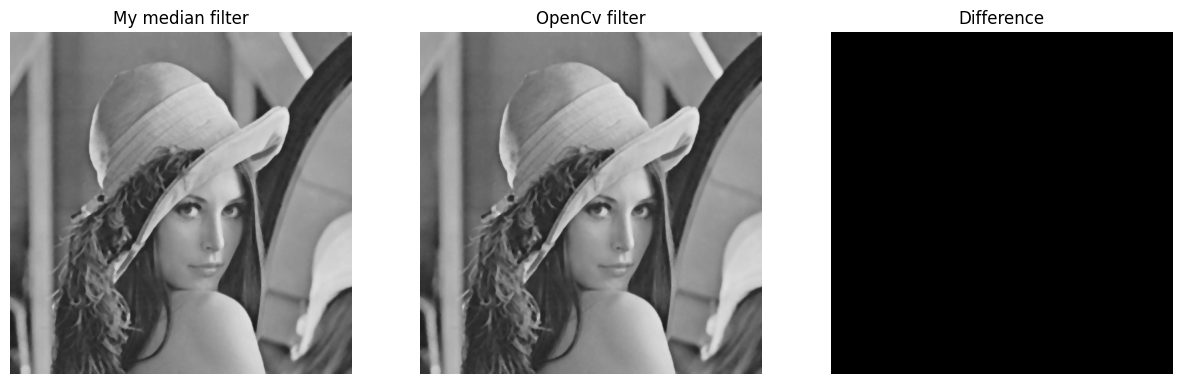

In [34]:
# OpenCv median Filter
median = cv.medianBlur(image,5)

fig = plt.figure(figsize=(15, 27)) 
  
# setting values to rows and column variables 
rows = 1
columns = 3

  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(final_image,cmap='gray',vmin=0,vmax=255)
plt.axis('off') 
plt.title("My median filter") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(median,cmap='gray',vmin=0,vmax=255)
plt.axis('off') 
plt.title("OpenCv filter") 

# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
  
# showing image 
plt.imshow(median-final_image,cmap='gray',vmin=0,vmax=255)
plt.axis('off') 
plt.title("Difference") 

# *End of First Part*



# For second question we need 4 image. 
1) My median filter's solution (5x5) = final_image
2) OpenCv's box filter output (5x5) = box_filter
3) OpenCv's Gaussian Filter output (7x7) = gauss_filtered
4) OpenCv's median filter output = median (5x5)

(-0.5, 511.5, 511.5, -0.5)

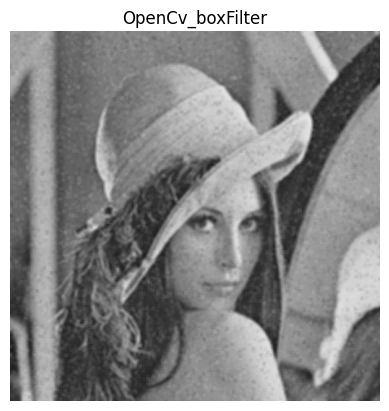

In [35]:

# Box filter
padding_size = 2
kernel = np.ones((5,5),np.float32)/(25)
image_padded_5_5 = cv.copyMakeBorder(image,padding_size,padding_size,padding_size,padding_size,cv.BORDER_REPLICATE)
dst_box = cv.filter2D(image_padded_5_5,-1,kernel)
box_filter = dst_box[padding_size:-padding_size,padding_size:-padding_size]

plt.imshow(box_filter,cmap='gray',vmin=0,vmax=255)
plt.title("OpenCv_boxFilter")
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

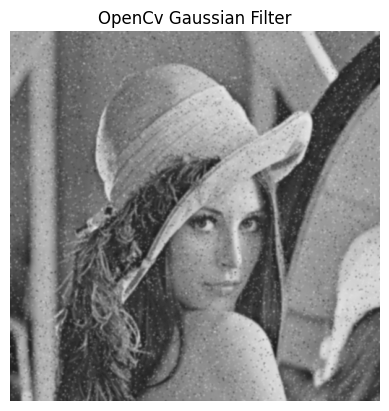

In [36]:
# Gauss Filter
padding_size = 3
image_padded_7_7 = cv.copyMakeBorder(image,padding_size,padding_size,padding_size,padding_size,cv.BORDER_REPLICATE)
sigma = 1.0  # Standart sapmayı ayarlama

dst_gauss = cv.GaussianBlur(image_padded_7_7, (7,7), sigma)
gauss_filtered = dst_gauss[padding_size:-padding_size,padding_size:-padding_size]

plt.imshow(gauss_filtered,cmap='gray',vmin=0,vmax=255)
plt.title("OpenCv Gaussian Filter")
plt.axis('off')


In [37]:
# Compare 4 filters by getting PSNRs
original_image = cv.imread(os.path.join(os.getcwd(),'original.jpg'),cv.IMREAD_GRAYSCALE)

# Calculate PSNR
psnr_my_median_filter = cv.PSNR(original_image, final_image)
psnr_box_filter = cv.PSNR(original_image, box_filter)
psnr_gaussian_filter = cv.PSNR(original_image, gauss_filtered)
psnr_openCv_median_filter = cv.PSNR(original_image, median)

print("PSNR: My Median(5x5)", psnr_my_median_filter)
print("PSNR: Box Filter (5x5)", psnr_box_filter)
print("PSNR: Gaussian Filter (7x7)", psnr_gaussian_filter)
print("PSNR: OpenCv Median(5x5)", psnr_openCv_median_filter)

PSNR: My Median(5x5) 31.029963635969523
PSNR: Box Filter (5x5) 27.68157114740497
PSNR: Gaussian Filter (7x7) 28.13917802256112
PSNR: OpenCv Median(5x5) 31.029963635969523


 *As the results show gaussian filter showed the best performance for our scenario* 
 
 *My median filter's performance matches with openCv median filter performance*

# *End of Second Part*




# For this part we will implement center weighted median filter

In [38]:
# We can use image_border_padded from before
weighted_median_filter_image = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        all_25_values = image_border_padded[i:i+5,j:j+5].flatten()
        mid_value = image_border_padded[i+2][j+2]
        # values_to_append = [mid_value, mid_value]
        all_27_values = np.append(all_25_values, [mid_value,mid_value])
        # new_arr = np.append(arr, values_to_append)
        weighted_median_filter_image[i,j]=np.sort(all_27_values)[13]

weighted_median_filter_image_final = weighted_median_filter_image.astype(np.uint8)


In [39]:
psnr = cv.PSNR(original_image,weighted_median_filter_image_final)
print(psnr)

32.133683290797514


# *Our weighted median filter implementation performed best for in this case*

For Question 4 I tried 3 different images with different density of noise.
When noise get worse our performance of box filter and gaussian filter decrease significantly.

But for Median filter (weighted or not) it still performs well enough.

For Question 5 We can just get the reflection of our image on x axis.
It still the same image but PSNR will be so low.
So PSNR will no be always reliable.i